In [234]:
import os
import keras
from keras import models
from keras import layers
from keras import regularizers
import numpy as np

print('<<MNIST digits recognition>>')
print('...... loading data')
x = np.load('data/train.npy')[1:, :]
np.random.shuffle(x)
# train, valiation and test split
n = len(x)
split_1 = int(n*0.8)
split_2 = int(n*0.9)
train = x[0:split_1, :]
validation = x[split_1:split_2, :]
test = x[split_2:, :]
print('#train examples: ', len(train), train.shape)
print('#valiation examples:', len(validation), validation.shape)
print('#test examples:', len(test), test.shape)

train_labels = train[:, 0]
train_data = train[:, 1:]
val_labels = validation[:, 0]
val_data = validation[:, 1:]
test_labels = test[:, 0]
test_data = test[:, 1:]

<<MNIST digits recognition>>
...... loading data
#train examples:  33600 (33600, 785)
#valiation examples: 4200 (4200, 785)
#test examples: 4200 (4200, 785)


In [235]:
LEARNING_RATE = 0.0001
L2_WEIGHT = 0.001
MODEL_PATH = 'my_model_dense.h5'

model = models.Sequential()
model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(L2_WEIGHT), 
                       activation='relu', input_shape=(784,)))
# model.add(layers.Dropout(0.5)) # dropout does not seem to work as well as L2
model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(L2_WEIGHT), 
                       activation='relu'))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(L2_WEIGHT), 
                       activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
if os.path.isfile(MODEL_PATH):
    model.load_weights(MODEL_PATH)

callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor='val_acc',
        patience=100
    ),
    keras.callbacks.ModelCheckpoint(
        filepath=MODEL_PATH,
        monitor='val_loss',
        save_best_only=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=10
    )
]

optimizer = keras.optimizers.Adam(lr = LEARNING_RATE)

# note: since we are using integers instead of one-hot vectors as labels,
# we use sparse_categorical_crossentropy as loss function instead of categorical_crossentropy
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, train_labels,
                    epochs=1000, batch_size=512,
                    callbacks=callbacks_list,
                    validation_data=(val_data, val_labels))

Train on 33600 samples, validate on 4200 samples
Epoch 1/1000
33600/33600 [==============================] - 2s 45us/step - loss: 0.0675 - acc: 0.9958 - val_loss: 0.0703 - val_acc: 0.9952
Epoch 2/1000
33600/33600 [==============================] - 0s 9us/step - loss: 0.0641 - acc: 0.9968 - val_loss: 0.0720 - val_acc: 0.9948
Epoch 3/1000
33600/33600 [==============================] - 0s 9us/step - loss: 0.0622 - acc: 0.9970 - val_loss: 0.0724 - val_acc: 0.9943
Epoch 4/1000
33600/33600 [==============================] - 0s 9us/step - loss: 0.0606 - acc: 0.9974 - val_loss: 0.0727 - val_acc: 0.9943
Epoch 5/1000
33600/33600 [==============================] - 0s 10us/step - loss: 0.0591 - acc: 0.9976 - val_loss: 0.0744 - val_acc: 0.9933
Epoch 6/1000
33600/33600 [==============================] - 0s 10us/step - loss: 0.0579 - acc: 0.9976 - val_loss: 0.0732 - val_acc: 0.9940
Epoch 7/1000
33600/33600 [==============================] - 0s 9us/step - loss: 0.0568 - acc: 0.9979 - val_loss: 0.0749 

Epoch 118/1000
33600/33600 [==============================] - 0s 9us/step - loss: 0.0511 - acc: 0.9985 - val_loss: 0.0755 - val_acc: 0.9924
Epoch 119/1000
33600/33600 [==============================] - 0s 9us/step - loss: 0.0511 - acc: 0.9985 - val_loss: 0.0755 - val_acc: 0.9924
Epoch 120/1000
33600/33600 [==============================] - 0s 8us/step - loss: 0.0511 - acc: 0.9985 - val_loss: 0.0755 - val_acc: 0.9924
Epoch 121/1000
33600/33600 [==============================] - 0s 8us/step - loss: 0.0511 - acc: 0.9985 - val_loss: 0.0755 - val_acc: 0.9924
Epoch 122/1000
33600/33600 [==============================] - 0s 9us/step - loss: 0.0511 - acc: 0.9985 - val_loss: 0.0755 - val_acc: 0.9924
Epoch 123/1000
33600/33600 [==============================] - 0s 8us/step - loss: 0.0511 - acc: 0.9985 - val_loss: 0.0755 - val_acc: 0.9924
Epoch 124/1000
33600/33600 [==============================] - 0s 8us/step - loss: 0.0511 - acc: 0.9985 - val_loss: 0.0755 - val_acc: 0.9924
Epoch 125/1000
33600

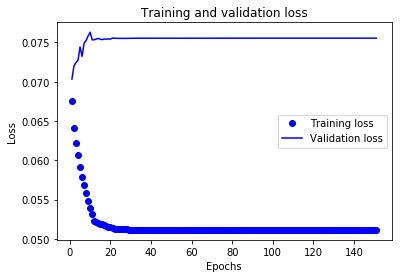

In [238]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

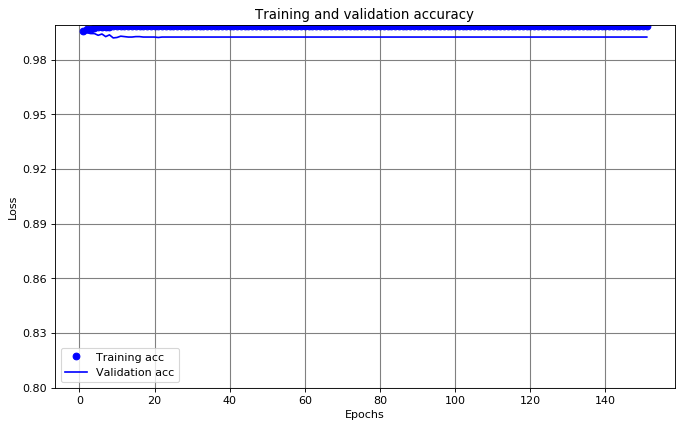

In [239]:
plt.clf()      # clear figure# clear  

from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.yticks(np.arange(0.8, 1, 0.03))
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [240]:
results = model.evaluate(test_data, test_labels)

4200/4200 [==============================] - 0s 40us/step


In [241]:
results

[0.069871366726500642, 0.9921428571428571]

In [242]:
# use the trained model to predict new data
new_x = np.load('data/test.npy')[1:, :]
print(new_x.shape)

(28000, 784)


In [243]:
predictions = model.predict(new_x)
print(predictions.shape)

file = open('predictions_dense.csv', 'w+')
file.write('ImageId,Label\n')
for i in range(predictions.shape[0]):
    digit = np.argmax(predictions[i])
    file.write(str(i+1) + ',' + str(digit) + '\n')

file.close()

(28000, 10)
